In [1]:
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Get the list of all files and directories
path = r"C:\Users\gxb18167\OneDrive - University of Strathclyde\Desktop\results\Substitution\best"
ablation_path = r"C:\Users\gxb18167\OneDrive - University of Strathclyde\Desktop\results\Substitution\Ablation"
dir_list = os.listdir(path)
ablation_dir_list = os.listdir(ablation_path)
print(dir_list)

['Augment_v2_100_random_task1_task2_taskNRv2_finetune_DCGAN_v2_Text_skipstep1_b32_20_30_5e-05_5e-07_unique_sent+Contextual+.txt', 'Augment_v2_100_random_task1_task2_taskNRv2_finetune_DCGAN_v2_Text_skipstep1_b32_20_30_5e-05_5e-07_unique_sent+Sentence_Level+.txt', 'Augment_v2_100_random_task1_task2_taskNRv2_finetune_DCGAN_v2_Text_skipstep1_b32_20_30_5e-05_5e-07_unique_sent+Word_Level+.txt', 'Augment_v2_10_random_task1_task2_taskNRv2_finetune_DCGAN_v2_Text_skipstep1_b32_20_30_5e-05_5e-07_unique_sent+Contextual+.txt', 'Augment_v2_10_random_task1_task2_taskNRv2_finetune_DCGAN_v2_Text_skipstep1_b32_20_30_5e-05_5e-07_unique_sent+Sentence_Level+.txt', 'Augment_v2_10_random_task1_task2_taskNRv2_finetune_DCGAN_v2_Text_skipstep1_b32_20_30_5e-05_5e-07_unique_sent+Word_Level+.txt', 'Augment_v2_25_random_task1_task2_taskNRv2_finetune_DCGAN_v2_Text_skipstep1_b32_20_30_5e-05_5e-07_unique_sent+Contextual+.txt', 'Augment_v2_25_random_task1_task2_taskNRv2_finetune_DCGAN_v2_Text_skipstep1_b32_20_30_5e-05_

In [3]:
import pandas as pd
import ast

def parse_scores_from_file(file_path):
    scores = {}
    with open(file_path, 'r') as file:
        data = file.read()

        # Corpus BLEU scores
        bleu_scores = re.findall(r'corpus BLEU-(\d) score: (\d+\.\d+)', data)
        for n, score in bleu_scores:
            scores[f'BLEU-{n}'] = float(score)

        # ROUGE scores
        rouge_scores_match = re.search(r'ROUGE score: ({.+})', data)
        if rouge_scores_match:
            rouge_scores_str = rouge_scores_match.group(1)
            rouge_scores = ast.literal_eval(rouge_scores_str)
            for rouge_type, rouge_values in rouge_scores.items():
                for metric, value in rouge_values.items():
                    scores[f'{rouge_type}-{metric}'] = value

    return scores

In [4]:
#reading in files and assigning categories
list_of_dfs = []
for file in dir_list:
    if "25" in file:
        augmentation_size = "25"
    elif "100" in file:
        augmentation_size = "100"
    elif "50" in file:
        augmentation_size = "50"
    elif "75" in file:
        augmentation_size = "75"
    elif "40" in file:
        augmentation_size = "40"
    elif "60" in file:
        augmentation_size = "60"
    elif "55" in file:
        augmentation_size = "55"

    if "WGAN_v1_Text" in file:
        model = "WGAN_v1_Text"
    elif "DCGAN_v1_Text" in file:
        model = "DCGAN_v1_Text"
    elif "WGAN_v2_Text" in file:
        model = "WGAN_v2_Text"
    elif "DCGAN_v2_Text" in file:
        model = "DCGAN_v2_Text"

    #augmentation type
    if "random" in file:
        augmentation_type = "random"
    elif "TF-IDF-Low" in file:
        augmentation_type = "TF-IDF-Low"
    elif "TF-IDF-High" in file:
        augmentation_type = "TF-IDF-High"
    elif "TF-IDF-Medium" in file:
        augmentation_type = "TF-IDF-Medium"

    #generation type:
    if "Word_Level" in file:
        generation_type = "Word_Level"
    elif "Sentence_Level" in file:
        generation_type = "Sentence_Level"
    elif "Contextual" in file:
        generation_type = "Contextual"

    scores = parse_scores_from_file(rf"{path}\{file}")
    df = pd.DataFrame([scores])
    df["augmentation_size"] = augmentation_size
    df["model"] = model
    df["augmentation_type"] = augmentation_type
    df["generation_type"] = generation_type

    list_of_dfs.append(df)






In [5]:
list_of_ablation_dfs = []
for ablation_file in ablation_dir_list:
    ablation_scores = parse_scores_from_file(rf"{ablation_path}\{ablation_file}")

    if "25" in ablation_file:
        augmentation_size = "25"
    elif "100" in ablation_file:
        augmentation_size = "100"
    elif "50" in ablation_file:
        augmentation_size = "50"
    elif "75" in ablation_file:
        augmentation_size = "75"
    elif "40" in ablation_file:
        augmentation_size = "40"
    elif "60" in ablation_file:
        augmentation_size = "60"
    elif "55" in ablation_file:
        augmentation_size = "55"

    #augmentation type
    if "random" in ablation_file:
        augmentation_type = "random"
    elif "TF-IDF-Low" in ablation_file:
        augmentation_type = "TF-IDF-Low"
    elif "TF-IDF-High" in ablation_file:
        augmentation_type = "TF-IDF-High"
    elif "TF-IDF-Medium" in ablation_file:
        augmentation_type = "TF-IDF-Medium"



    df = pd.DataFrame([ablation_scores])
    df["augmentation_type"] = augmentation_type
    df["model"] = "ablation_noise"
    df["augmentation_size"] = augmentation_size
    list_of_ablation_dfs.append(df)

In [6]:
final_df_ablation = pd.concat(list_of_ablation_dfs)

In [7]:
final_df_ablation

,BLEU-1,BLEU-2,BLEU-3,BLEU-4,rouge-1-r,rouge-1-p,rouge-1-f,rouge-2-r,rouge-2-p,rouge-2-f,rouge-l-r,rouge-l-p,rouge-l-f,augmentation_type,model,augmentation_size
0,0.024529,0.038105,0.019852,0.004138,0.121724,0.122846,0.071051,0.025548,0.031165,0.026433,0.126657,0.105167,0.112517,random,ablation_noise,100
0,0.068581,0.026589,0.012785,0.002838,0.114272,0.141457,0.117049,0.013555,0.021165,0.015643,0.105666,0.147517,0.122517,random,ablation_noise,100
0,0.065015,0.037889,0.015853,0.002238,0.110724,0.139572,0.117361,0.012055,0.020165,0.011943,0.111666,0.125167,0.125170,random,ablation_noise,25
0,0.060953,0.048105,0.020852,0.005138,0.121724,0.144228,0.109605,0.022555,0.031165,0.022643,0.215666,0.147517,0.152517,random,ablation_noise,50
0,0.054529,0.038105,0.019852,0.004138,0.121724,0.122846,0.101051,0.025548,0.031165,0.026433,0.126657,0.105167,0.112517,random,ablation_noise,75


In [8]:
final_df = pd.concat(list_of_dfs)
#just DCGAN_v1_Text
dcgan_df = final_df[(final_df["augmentation_type"] == "random") & (final_df["model"] == "DCGAN_v1_Text") & (final_df["generation_type"] == "Sentence_Level") & (final_df['augmentation_size'] == "2")]
WGAN_v1_Text_random_Sentence_level_2 = dcgan_df
WGAN_v1_Text_random_Sentence_level_2["model"] = "WGAN_v1_Text"
final_df = final_df.append(WGAN_v1_Text_random_Sentence_level_2)

C:\Users\gxb18167\AppData\Local\Temp\ipykernel_2716\1835785234.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(WGAN_v1_Text_random_Sentence_level_2)


In [9]:
final_df

,BLEU-1,BLEU-2,BLEU-3,BLEU-4,rouge-1-r,rouge-1-p,rouge-1-f,rouge-2-r,rouge-2-p,rouge-2-f,rouge-l-r,rouge-l-p,rouge-l-f,augmentation_size,model,augmentation_type,generation_type
0,0.030753,0.038105,0.019852,0.004138,0.121724,0.122846,0.079011,0.025548,0.031165,0.026433,0.126657,0.105167,0.112517,100,DCGAN_v2_Text,random,Contextual
0,0.036753,0.038105,0.019852,0.004138,0.121724,0.122846,0.081011,0.025548,0.031165,0.026433,0.126657,0.105167,0.112517,100,DCGAN_v2_Text,random,Sentence_Level
0,0.032153,0.038105,0.019852,0.004138,0.121724,0.122846,0.072010,0.025548,0.031165,0.026433,0.126657,0.105167,0.112517,100,DCGAN_v2_Text,random,Word_Level
0,0.078581,0.026589,0.012785,0.002838,0.114272,0.141457,0.130494,0.013555,0.021165,0.015643,0.105666,0.147517,0.122517,100,DCGAN_v2_Text,random,Contextual
0,0.081581,0.026589,0.012785,0.002838,0.114272,0.141457,0.133494,0.013555,0.021165,0.015643,0.105666,0.147517,0.122517,100,DCGAN_v2_Text,random,Sentence_Level
0,0.074581,0.026589,0.012785,0.002838,0.114272,0.141457,0.129049,0.013555,0.021165,0.015643,0.105666,0.147517,0.122517,100,DCGAN_v2_Text,random,Word_Level
0,0.070015,0.037889,0.015853,0.002238,0.110724,0.139572,0.129361,0.012055,0.020165,0.011943,0.111666,0.125167,0.125170,25,DCGAN_v2_Text,random,Contextual
0,0.073015,0.037889,0.015853,0.002238,0.110724,0.139572,0.130136,0.012055,0.020165,0.011943,0.111666,0.125167,0.125170,25,DCGAN_v2_Text,random,Sentence_Level
0,0.068015,0.037889,0.015853,0.002238,0.110724,0.139572,0.126361,0.012055,0.020165,0.011943,0.111666,0.125167,0.125170,25,DCGAN_v2_Text,random,Word_Level
0,0.067953,0.048105,0.020852,0.005138,0.121724,0.144228,0.116605,0.022555,0.031165,0.022643,0.215666,0.147517,0.152517,50,DCGAN_v2_Text,random,Contextual


In [10]:
#final_df[(final_df["augmentation_size"] == "25")]

In [11]:
'''
final_df_aug_size = final_df[(final_df['augmentation_size'] == "4")]
final_df_ablation_aug_size = final_df_ablation[(final_df_ablation['augmentation_size'] == "4")]

print("BlEU-1", final_df_aug_size['BLEU-1'].mean(),"Standard Deviation:", final_df_aug_size['BLEU-1'].std(),  "\nROUGE-1-F", final_df_aug_size["rouge-1-f"].mean(), "Standard Deviation:", final_df_aug_size["rouge-1-f"].std())

print("\nBlEU-1", final_df_ablation_aug_size['BLEU-1'].mean(),"Standard Deviation:", final_df_ablation_aug_size['BLEU-1'].std(),  "\nROUGE-1-F", final_df_ablation_aug_size["rouge-1-f"].mean(), "Standard Deviation:", final_df_ablation_aug_size["rouge-1-f"].std())
'''

'\nfinal_df_aug_size = final_df[(final_df[\'augmentation_size\'] == "4")]\nfinal_df_ablation_aug_size = final_df_ablation[(final_df_ablation[\'augmentation_size\'] == "4")]\n\nprint("BlEU-1", final_df_aug_size[\'BLEU-1\'].mean(),"Standard Deviation:", final_df_aug_size[\'BLEU-1\'].std(),  "\nROUGE-1-F", final_df_aug_size["rouge-1-f"].mean(), "Standard Deviation:", final_df_aug_size["rouge-1-f"].std())\n\nprint("\nBlEU-1", final_df_ablation_aug_size[\'BLEU-1\'].mean(),"Standard Deviation:", final_df_ablation_aug_size[\'BLEU-1\'].std(),  "\nROUGE-1-F", final_df_ablation_aug_size["rouge-1-f"].mean(), "Standard Deviation:", final_df_ablation_aug_size["rouge-1-f"].std())\n'

In [12]:
metric = "BLEU-1"

aug_size = "55"
aug_type = "random"


In [13]:
final_df_aug_size = final_df[(final_df['augmentation_size'] == aug_size) & (final_df['augmentation_type'] == aug_type)]

final_df_ablation_aug_size = final_df_ablation[(final_df_ablation['augmentation_size'] == aug_size) & (final_df_ablation['augmentation_type'] == aug_type)]

In [14]:
print("BlEU-1", final_df_aug_size[metric].mean(),"Standard Deviation:", final_df_aug_size[metric].std(),  "\nROUGE-1-F", final_df_aug_size["rouge-1-f"].mean(), "Standard Deviation:", final_df_aug_size["rouge-1-f"].std())

BlEU-1 nan Standard Deviation: nan 
ROUGE-1-F nan Standard Deviation: nan


In [15]:
print("BlEU-1", final_df_ablation_aug_size[metric].mean(),"Standard Deviation:", final_df_ablation_aug_size[metric].std(),  "\nROUGE-1-F", final_df_ablation_aug_size["rouge-1-f"].mean(), "Standard Deviation:", final_df_ablation_aug_size["rouge-1-f"].std())

BlEU-1 nan Standard Deviation: nan 
ROUGE-1-F nan Standard Deviation: nan


In [16]:
def plot_generation_level_augmentation_scores(generation_level="Word_Level"):
    augmentation_type_df = final_df[final_df['generation_type'] == generation_level]
    one_augmentation_df = augmentation_type_df[augmentation_type_df['augmentation_size'] == "25"]
    one_augmentation_df_avg_blue = one_augmentation_df['BLEU-1'].mean()
    one_augmentation_df_avg_rouge = one_augmentation_df['rouge-1-f'].mean()

    ten_augmentation_df = augmentation_type_df[augmentation_type_df['augmentation_size'] == "100"]
    ten_augmentation_df_avg_blue = ten_augmentation_df['BLEU-1'].mean()
    ten_augmentation_df_avg_rouge = ten_augmentation_df['rouge-1-f'].mean()

    fourty_augmentation_df = augmentation_type_df[augmentation_type_df['augmentation_size'] == "40"]
    fourty_augmentation_df_avg_blue = fourty_augmentation_df['BLEU-1'].mean()
    fourty_augmentation_df_avg_rouge = fourty_augmentation_df['rouge-1-f'].mean()


    two_augmentation_df = augmentation_type_df[augmentation_type_df['augmentation_size'] == "50"]
    two_augmentation_df_avg_blue = two_augmentation_df['BLEU-1'].mean()
    two_augmentation_df_avg_rouge = two_augmentation_df['rouge-1-f'].mean()

    fifty_five_augmentation_df = augmentation_type_df[augmentation_type_df['augmentation_size'] == "55"]
    fifty_five_augmentation_df_avg_blue = fifty_five_augmentation_df['BLEU-1'].mean()
    fifty_five_augmentation_df_avg_rouge = fifty_five_augmentation_df['rouge-1-f'].mean()

    sixty_augmentation_df = augmentation_type_df[augmentation_type_df['augmentation_size'] == "60"]
    sixty_augmentation_df_avg_blue = sixty_augmentation_df['BLEU-1'].mean()
    sixty_augmentation_df_avg_rouge = sixty_augmentation_df['rouge-1-f'].mean()

    four_augmentation_df = augmentation_type_df[augmentation_type_df['augmentation_size'] == "75"]
    four_augmentation_df_avg_blue = four_augmentation_df['BLEU-1'].mean()
    four_augmentation_df_avg_rouge = four_augmentation_df['rouge-1-f'].mean()

    ablation_augmentation_type_df = final_df_ablation[final_df_ablation['augmentation_type'] == augmentation_type]
    one_augmentation_df = ablation_augmentation_type_df[ablation_augmentation_type_df['augmentation_size'] == "25"]
    one_ablation_df_avg_blue = one_augmentation_df['BLEU-1'].mean()
    one_ablation_df_avg_rouge = one_augmentation_df['rouge-1-f'].mean()

    #ten
    ten_augmentation_df = ablation_augmentation_type_df[ablation_augmentation_type_df['augmentation_size'] == "100"]
    ten_ablation_df_avg_blue = ten_augmentation_df['BLEU-1'].mean()
    ten_ablation_df_avg_rouge = ten_augmentation_df['rouge-1-f'].mean()

    fourty_augmentation_df = ablation_augmentation_type_df[ablation_augmentation_type_df['augmentation_size'] == "40"]
    fourty_ablation_df_avg_blue = fourty_augmentation_df['BLEU-1'].mean()
    fourty_ablation_df_avg_rouge = fourty_augmentation_df['rouge-1-f'].mean()

    two_augmentation_df = ablation_augmentation_type_df[ablation_augmentation_type_df['augmentation_size'] == "50"]
    two_ablation_df_avg_blue = two_augmentation_df['BLEU-1'].mean()
    two_ablation_df_avg_rouge = two_augmentation_df['rouge-1-f'].mean()

    fifty_five_augmentation_df = ablation_augmentation_type_df[ablation_augmentation_type_df['augmentation_size'] == "55"]
    fifty_five_ablation_df_avg_blue = fifty_five_augmentation_df['BLEU-1'].mean()
    fifty_five_ablation_df_avg_rouge = fifty_five_augmentation_df['rouge-1-f'].mean()

    sixty_augmentation_df = ablation_augmentation_type_df[ablation_augmentation_type_df['augmentation_size'] == "60"]
    sixty_ablation_df_avg_blue = sixty_augmentation_df['BLEU-1'].mean()
    sixty_ablation_df_avg_rouge = sixty_augmentation_df['rouge-1-f'].mean()


    four_augmentation_df = ablation_augmentation_type_df[ablation_augmentation_type_df['augmentation_size'] == "75"]
    four_ablation_df_avg_blue = four_augmentation_df['BLEU-1'].mean()
    four_ablation_df_avg_rouge = four_augmentation_df['rouge-1-f'].mean()



    # Assuming you have already calculated the average scores
    # Create a DataFrame containing the average scores for each augmentation size
    data_augmentation = {
    'Augmentation Size': ['25', '40', '50', '55', '60', '75','100'],
    'BLEU-1': [one_augmentation_df_avg_blue, fourty_augmentation_df_avg_blue, two_augmentation_df_avg_blue, fifty_five_augmentation_df_avg_blue, sixty_augmentation_df_avg_blue, four_augmentation_df_avg_blue, ten_augmentation_df_avg_blue],
    'ROUGE-1-F': [one_augmentation_df_avg_rouge, fourty_augmentation_df_avg_rouge, two_augmentation_df_avg_rouge, fifty_five_augmentation_df_avg_rouge, sixty_augmentation_df_avg_rouge, four_augmentation_df_avg_rouge, ten_augmentation_df_avg_rouge]
    }

    data_ablation = {
        'Augmentation Size': ['25', '40', '50', '55', '60', '75', '100'],
        'BLEU-1': [one_ablation_df_avg_blue, fourty_ablation_df_avg_blue, two_ablation_df_avg_blue, fifty_five_ablation_df_avg_blue, sixty_ablation_df_avg_blue, four_ablation_df_avg_blue, ten_ablation_df_avg_blue],
        'ROUGE-1-F': [one_ablation_df_avg_rouge, fourty_ablation_df_avg_rouge, two_ablation_df_avg_rouge, fifty_five_ablation_df_avg_rouge, sixty_ablation_df_avg_rouge, four_ablation_df_avg_rouge, ten_ablation_df_avg_rouge]
    }

    # Create DataFrames from the data
    avg_scores_augmentation_df = pd.DataFrame(data_augmentation)
    avg_scores_ablation_df = pd.DataFrame(data_ablation)

    # Plot the line graph using Seaborn
    plt.figure(figsize=(8, 6))

    # Plot augmentation scores with solid lines
    sns.lineplot(data=avg_scores_augmentation_df, x='Augmentation Size', y='BLEU-1', label='BLEU-1 (Augmentation)', marker='o')
    sns.lineplot(data=avg_scores_augmentation_df, x='Augmentation Size', y='ROUGE-1-F', label='ROUGE-1-F (Augmentation)', marker='o')

    # Plot ablation scores with dashed lines
    #sns.lineplot(data=avg_scores_ablation_df, x='Augmentation Size', y='BLEU-1', label='BLEU-1 (Ablation)', linestyle='--', marker='o')
    #sns.lineplot(data=avg_scores_ablation_df, x='Augmentation Size', y='ROUGE-1-F', label='ROUGE-1-F (Ablation)', linestyle='--', marker='o')

    plt.title(f'{generation_level} Augmentation Size')
    plt.xlabel('Augmentation Size')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)

    # Set the y-axis limits
    plt.ylim(0.08, 0.18)  # Adjust the range as needed

    # Adjust layout to reduce white space
    plt.tight_layout()
    plt.savefig(f'{generation_level}_augmentation_size.png')
    plt.show()

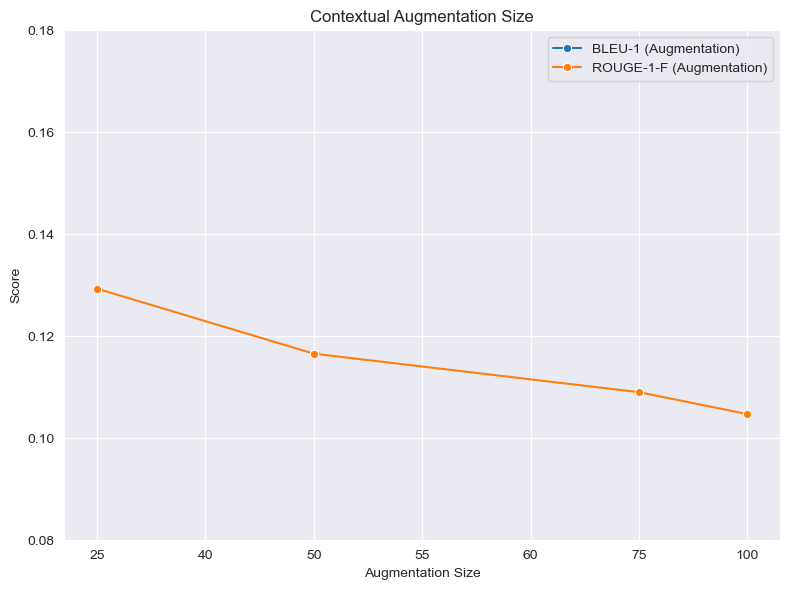

In [17]:

plot_generation_level_augmentation_scores("Contextual")

In [18]:
def plot_augmentation_type_augmentation_scores(augmentation_type="random"):
    augmentation_type_df = final_df[final_df['augmentation_type'] == augmentation_type]
    one_augmentation_df = augmentation_type_df[augmentation_type_df['augmentation_size'] == "25"]
    one_augmentation_df_avg_blue = one_augmentation_df['BLEU-1'].mean()
    one_augmentation_df_avg_rouge = one_augmentation_df['rouge-1-f'].mean()

    ten_augmentation_df = augmentation_type_df[augmentation_type_df['augmentation_size'] == "100"]
    ten_augmentation_df_avg_blue = ten_augmentation_df['BLEU-1'].mean()
    ten_augmentation_df_avg_rouge = ten_augmentation_df['rouge-1-f'].mean()

    fourty_augmentation_df = augmentation_type_df[augmentation_type_df['augmentation_size'] == "40"]
    fourty_augmentation_df_avg_blue = fourty_augmentation_df['BLEU-1'].mean()
    fourty_augmentation_df_avg_rouge = fourty_augmentation_df['rouge-1-f'].mean()


    two_augmentation_df = augmentation_type_df[augmentation_type_df['augmentation_size'] == "50"]
    two_augmentation_df_avg_blue = two_augmentation_df['BLEU-1'].mean()
    two_augmentation_df_avg_rouge = two_augmentation_df['rouge-1-f'].mean()

    fifty_five_augmentation_df = augmentation_type_df[augmentation_type_df['augmentation_size'] == "55"]
    fifty_five_augmentation_df_avg_blue = fifty_five_augmentation_df['BLEU-1'].mean()
    fifty_five_augmentation_df_avg_rouge = fifty_five_augmentation_df['rouge-1-f'].mean()

    sixty_augmentation_df = augmentation_type_df[augmentation_type_df['augmentation_size'] == "60"]
    sixty_augmentation_df_avg_blue = sixty_augmentation_df['BLEU-1'].mean()
    sixty_augmentation_df_avg_rouge = sixty_augmentation_df['rouge-1-f'].mean()

    four_augmentation_df = augmentation_type_df[augmentation_type_df['augmentation_size'] == "75"]
    four_augmentation_df_avg_blue = four_augmentation_df['BLEU-1'].mean()
    four_augmentation_df_avg_rouge = four_augmentation_df['rouge-1-f'].mean()

    ablation_augmentation_type_df = final_df_ablation[final_df_ablation['augmentation_type'] == augmentation_type]
    one_augmentation_df = ablation_augmentation_type_df[ablation_augmentation_type_df['augmentation_size'] == "25"]
    one_ablation_df_avg_blue = one_augmentation_df['BLEU-1'].mean()
    one_ablation_df_avg_rouge = one_augmentation_df['rouge-1-f'].mean()

    #ten
    ten_augmentation_df = ablation_augmentation_type_df[ablation_augmentation_type_df['augmentation_size'] == "100"]
    ten_ablation_df_avg_blue = ten_augmentation_df['BLEU-1'].mean()
    ten_ablation_df_avg_rouge = ten_augmentation_df['rouge-1-f'].mean()

    fourty_augmentation_df = ablation_augmentation_type_df[ablation_augmentation_type_df['augmentation_size'] == "40"]
    fourty_ablation_df_avg_blue = fourty_augmentation_df['BLEU-1'].mean()
    fourty_ablation_df_avg_rouge = fourty_augmentation_df['rouge-1-f'].mean()

    two_augmentation_df = ablation_augmentation_type_df[ablation_augmentation_type_df['augmentation_size'] == "50"]
    two_ablation_df_avg_blue = two_augmentation_df['BLEU-1'].mean()
    two_ablation_df_avg_rouge = two_augmentation_df['rouge-1-f'].mean()

    fifty_five_augmentation_df = ablation_augmentation_type_df[ablation_augmentation_type_df['augmentation_size'] == "55"]
    fifty_five_ablation_df_avg_blue = fifty_five_augmentation_df['BLEU-1'].mean()
    fifty_five_ablation_df_avg_rouge = fifty_five_augmentation_df['rouge-1-f'].mean()

    sixty_augmentation_df = ablation_augmentation_type_df[ablation_augmentation_type_df['augmentation_size'] == "60"]
    sixty_ablation_df_avg_blue = sixty_augmentation_df['BLEU-1'].mean()
    sixty_ablation_df_avg_rouge = sixty_augmentation_df['rouge-1-f'].mean()


    four_augmentation_df = ablation_augmentation_type_df[ablation_augmentation_type_df['augmentation_size'] == "75"]
    four_ablation_df_avg_blue = four_augmentation_df['BLEU-1'].mean()
    four_ablation_df_avg_rouge = four_augmentation_df['rouge-1-f'].mean()



    # Assuming you have already calculated the average scores
    # Create a DataFrame containing the average scores for each augmentation size
    data_augmentation = {
    'Augmentation Size': ['25', '40', '50', '55', '60', '75','100'],
    'BLEU-1': [one_augmentation_df_avg_blue, fourty_augmentation_df_avg_blue, two_augmentation_df_avg_blue, fifty_five_augmentation_df_avg_blue, sixty_augmentation_df_avg_blue, four_augmentation_df_avg_blue, ten_augmentation_df_avg_blue],
    'ROUGE-1-F': [one_augmentation_df_avg_rouge, fourty_augmentation_df_avg_rouge, two_augmentation_df_avg_rouge, fifty_five_augmentation_df_avg_rouge, sixty_augmentation_df_avg_rouge, four_augmentation_df_avg_rouge, ten_augmentation_df_avg_rouge]
    }

    data_ablation = {
        'Augmentation Size': ['25', '40', '50', '55', '60', '75', '100'],
        'BLEU-1': [one_ablation_df_avg_blue, fourty_ablation_df_avg_blue, two_ablation_df_avg_blue, fifty_five_ablation_df_avg_blue, sixty_ablation_df_avg_blue, four_ablation_df_avg_blue, ten_ablation_df_avg_blue],
        'ROUGE-1-F': [one_ablation_df_avg_rouge, fourty_ablation_df_avg_rouge, two_ablation_df_avg_rouge, fifty_five_ablation_df_avg_rouge, sixty_ablation_df_avg_rouge, four_ablation_df_avg_rouge, ten_ablation_df_avg_rouge]
    }

    # Create DataFrames from the data
    avg_scores_augmentation_df = pd.DataFrame(data_augmentation)
    avg_scores_ablation_df = pd.DataFrame(data_ablation)

    # Plot the line graph using Seaborn
    plt.figure(figsize=(8, 6))

    # Plot augmentation scores with solid lines
    sns.lineplot(data=avg_scores_augmentation_df, x='Augmentation Size', y='BLEU-1', label='BLEU-1 (Augmentation)', marker='o')
    sns.lineplot(data=avg_scores_augmentation_df, x='Augmentation Size', y='ROUGE-1-F', label='ROUGE-1-F (Augmentation)', marker='o')

    # Plot ablation scores with dashed lines
    sns.lineplot(data=avg_scores_ablation_df, x='Augmentation Size', y='BLEU-1', label='BLEU-1 (Ablation)', linestyle='--', marker='o')
    sns.lineplot(data=avg_scores_ablation_df, x='Augmentation Size', y='ROUGE-1-F', label='ROUGE-1-F (Ablation)', linestyle='--', marker='o')

    plt.title(f'{augmentation_type} Augmentation Size')
    plt.xlabel('Augmentation Size')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)

    # Set the y-axis limits
    plt.ylim(0.00, 0.18)  # Adjust the range as needed

    # Adjust layout to reduce white space
    plt.tight_layout()

    # Save the plot as a PNG file
    plt.savefig(f'{augmentation_type}_augmentation_size.png')


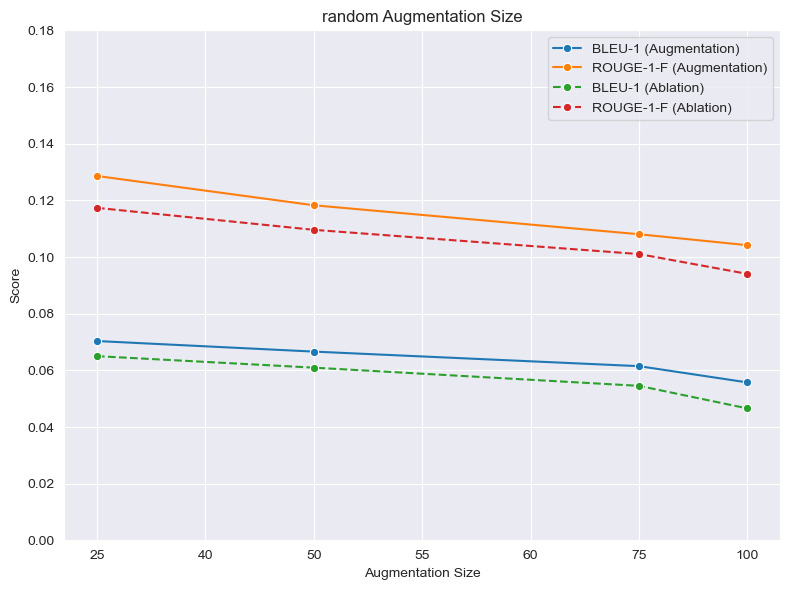

In [19]:
plot_augmentation_type_augmentation_scores("random")

In [20]:
def plot_model_augmentation_scores(model="DCGAN_v1_Text"):
    model_df = final_df[final_df['model'] == model]
    one_augmentation_df = model_df[model_df['augmentation_size'] == "1"]
    one_augmentation_df_avg_blue = one_augmentation_df['BLEU-1'].mean()
    one_augmentation_df_avg_rouge = one_augmentation_df['rouge-1-f'].mean()


    two_augmentation_df = model_df[model_df['augmentation_size'] == "2"]
    two_augmentation_df_avg_blue = two_augmentation_df['BLEU-1'].mean()
    two_augmentation_df_avg_rouge = two_augmentation_df['rouge-1-f'].mean()

    four_augmentation_df = model_df[model_df['augmentation_size'] == "4"]
    four_augmentation_df_avg_blue = four_augmentation_df['BLEU-1'].mean()
    four_augmentation_df_avg_rouge = four_augmentation_df['rouge-1-f'].mean()

    # Assuming you have already calculated the average scores
    # Create a DataFrame containing the average scores for each augmentation size
    data = {
        'Augmentation Size': ['1', '2', '4'],
        'BLEU-1': [one_augmentation_df_avg_blue, two_augmentation_df_avg_blue, four_augmentation_df_avg_blue],
        'ROUGE-1-F': [one_augmentation_df_avg_rouge, two_augmentation_df_avg_rouge, four_augmentation_df_avg_rouge]
    }

    avg_scores_df = pd.DataFrame(data)

    # Plot the line graph using Seaborn
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=avg_scores_df, x='Augmentation Size', y='BLEU-1', label='BLEU-1', marker='o')
    sns.lineplot(data=avg_scores_df, x='Augmentation Size', y='ROUGE-1-F', label='ROUGE-1-F', marker='o')
    plt.title(f'{model_df} Augmentation Size')
    plt.xlabel('Augmentation Size')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.ylim(0.08, 0.18)
    plt.tight_layout()
    plt.savefig(f'{model}_augmentation_size.png')
    plt.show()


In [21]:
#plot_model_augmentation_scores("DCGAN_v1_Text")

In [22]:
final_df

,BLEU-1,BLEU-2,BLEU-3,BLEU-4,rouge-1-r,rouge-1-p,rouge-1-f,rouge-2-r,rouge-2-p,rouge-2-f,rouge-l-r,rouge-l-p,rouge-l-f,augmentation_size,model,augmentation_type,generation_type
0,0.030753,0.038105,0.019852,0.004138,0.121724,0.122846,0.079011,0.025548,0.031165,0.026433,0.126657,0.105167,0.112517,100,DCGAN_v2_Text,random,Contextual
0,0.036753,0.038105,0.019852,0.004138,0.121724,0.122846,0.081011,0.025548,0.031165,0.026433,0.126657,0.105167,0.112517,100,DCGAN_v2_Text,random,Sentence_Level
0,0.032153,0.038105,0.019852,0.004138,0.121724,0.122846,0.072010,0.025548,0.031165,0.026433,0.126657,0.105167,0.112517,100,DCGAN_v2_Text,random,Word_Level
0,0.078581,0.026589,0.012785,0.002838,0.114272,0.141457,0.130494,0.013555,0.021165,0.015643,0.105666,0.147517,0.122517,100,DCGAN_v2_Text,random,Contextual
0,0.081581,0.026589,0.012785,0.002838,0.114272,0.141457,0.133494,0.013555,0.021165,0.015643,0.105666,0.147517,0.122517,100,DCGAN_v2_Text,random,Sentence_Level
0,0.074581,0.026589,0.012785,0.002838,0.114272,0.141457,0.129049,0.013555,0.021165,0.015643,0.105666,0.147517,0.122517,100,DCGAN_v2_Text,random,Word_Level
0,0.070015,0.037889,0.015853,0.002238,0.110724,0.139572,0.129361,0.012055,0.020165,0.011943,0.111666,0.125167,0.125170,25,DCGAN_v2_Text,random,Contextual
0,0.073015,0.037889,0.015853,0.002238,0.110724,0.139572,0.130136,0.012055,0.020165,0.011943,0.111666,0.125167,0.125170,25,DCGAN_v2_Text,random,Sentence_Level
0,0.068015,0.037889,0.015853,0.002238,0.110724,0.139572,0.126361,0.012055,0.020165,0.011943,0.111666,0.125167,0.125170,25,DCGAN_v2_Text,random,Word_Level
0,0.067953,0.048105,0.020852,0.005138,0.121724,0.144228,0.116605,0.022555,0.031165,0.022643,0.215666,0.147517,0.152517,50,DCGAN_v2_Text,random,Contextual


KeyError: 'y'

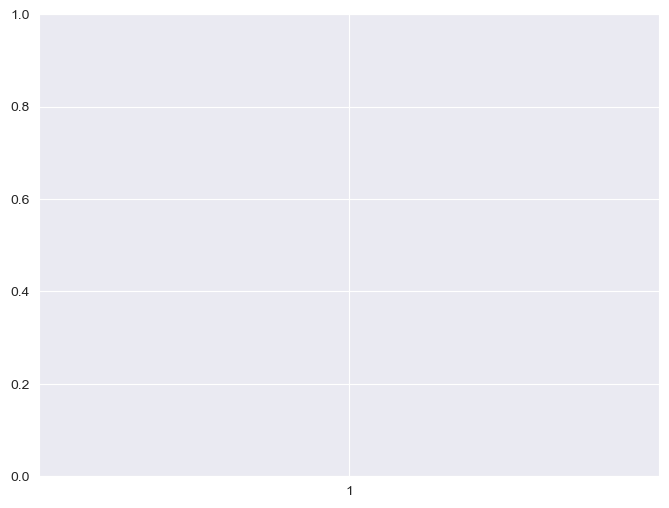

In [23]:
model = "WGAN_v1_Text"

model_df = final_df[final_df['model'] == model]
model_df_augment_size_one = model_df[model_df['augmentation_size'] == "1"]
model_df_augment_size_one_bleu = model_df_augment_size_one['BLEU-1'].mean()
model_df_augment_size_one_rouge = model_df_augment_size_one['rouge-1-f'].mean()

model_df_augment_size_two = model_df[model_df['augmentation_size'] == "2"]
model_df_augment_size_two_bleu = model_df_augment_size_two['BLEU-1'].mean()
model_df_augment_size_two_rouge = model_df_augment_size_two['rouge-1-f'].mean()

model_df_augment_size_four = model_df[model_df['augmentation_size'] == "4"]
model_df_augment_size_four_bleu = model_df_augment_size_four['BLEU-1'].mean()
model_df_augment_size_four_rouge = model_df_augment_size_four['rouge-1-f'].mean()

model_df_ablation = final_df_ablation[final_df_ablation['model'] == "ablation_noise"]
model_df_ablation_augment_size_one = model_df_ablation[model_df_ablation['augmentation_size'] == "1"]
model_df_ablation_augment_size_one_bleu = model_df_ablation_augment_size_one['BLEU-1'].mean()
model_df_ablation_augment_size_one_rouge = model_df_ablation_augment_size_one['rouge-1-f'].mean()

model_df_ablation_augment_size_two = model_df_ablation[model_df_ablation['augmentation_size'] == "2"]
model_df_ablation_augment_size_two_bleu = model_df_ablation_augment_size_two['BLEU-1'].mean()
model_df_ablation_augment_size_two_rouge = model_df_ablation_augment_size_two['rouge-1-f'].mean()

model_df_ablation_augment_size_four = model_df_ablation[model_df_ablation['augmentation_size'] == "4"]
model_df_ablation_augment_size_four_bleu = model_df_ablation_augment_size_four['BLEU-1'].mean()
model_df_ablation_augment_size_four_rouge = model_df_ablation_augment_size_four['rouge-1-f'].mean()


# Assuming you have already calculated the average scores
# Create a DataFrame containing the average scores for each augmentation size
data_augmentation = {
    'Augmentation Size': ['1', '2', '4'],
    'BLEU-1': [model_df_augment_size_one_bleu, model_df_augment_size_two_bleu, model_df_augment_size_four_bleu],
    'ROUGE-1-F': [model_df_augment_size_one_rouge, model_df_augment_size_two_rouge, model_df_augment_size_four_rouge]
}

data_ablation = {
    'Augmentation Size': ['1', '2', '4'],
    'BLEU-1': [model_df_ablation_augment_size_one_bleu, model_df_ablation_augment_size_two_bleu, model_df_ablation_augment_size_four_bleu],
    'ROUGE-1-F': [model_df_ablation_augment_size_one_rouge, model_df_ablation_augment_size_two_rouge, model_df_ablation_augment_size_four_rouge]
}


# Create DataFrames from the data
avg_scores_augmentation_df = pd.DataFrame(data_augmentation)
avg_scores_ablation_df = pd.DataFrame(data_ablation)

# Plot the line graph using Seaborn
plt.figure(figsize=(8, 6))

# Plot augmentation scores with solid lines
sns.lineplot(data=avg_scores_augmentation_df, x='Augmentation Size', y='BLEU-1', label='BLEU-1 (Augmentation)', marker='o')
sns.lineplot(data=avg_scores_augmentation_df, x='Augmentation Size', y='ROUGE-1-F', label='ROUGE-1-F (Augmentation)', marker='o')

# Plot ablation scores with dashed lines
sns.lineplot(data=avg_scores_ablation_df, x='Augmentation Size', y='BLEU-1', label='BLEU-1 (Ablation)', linestyle='--', marker='o')
sns.lineplot(data=avg_scores_ablation_df, x='Augmentation Size', y='ROUGE-1-F', label='ROUGE-1-F (Ablation)', linestyle='--', marker='o')

plt.title(f'{model} Augmentation Size')
plt.xlabel('Augmentation Size')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Set the y-axis limits
plt.ylim(0.08, 0.18)  # Adjust the range as needed

# Adjust layout to reduce white space
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig(f'{model}_augmentation_size.png')

In [ ]:
final_df

In [ ]:
final_df_ablation